# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Loading Dataset

In [2]:
mnist = tf.keras.datasets.mnist               # 28 x 28 images of handwritten images
(x_train,y_train), (x_test,y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


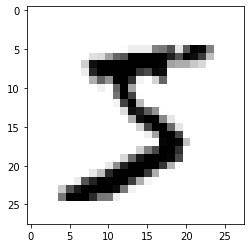

In [3]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

* Normalizing the values to 0-1



In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
x_train[0]

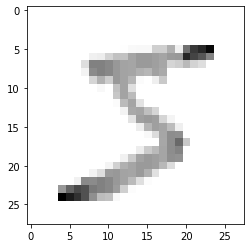

In [6]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

# Model Creation

In [11]:
# Building the Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())                         #  INPUT LAYER
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #  HIDDEN LAYER 1  128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #  HIDDEN LAYER 2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  #  OUTPUT LAYER 

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9246
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0725 - accuracy: 0.9770


We can see that loss is decreasing and accuracy is increasing

# Model Testing

In [12]:
# Testing 

val_loss, val_acc = model.evaluate(x_test,y_test)
print('Loss = ',val_loss)
print('Accuracy = ',val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0903 - accuracy: 0.9716
Loss =  0.09027121961116791
Accuracy =  0.9715999960899353


# Saving the model

In [13]:
model.save('Reader.model')

INFO:tensorflow:Assets written to: Reader.model/assets


In [14]:
# Loading the model
new_model = tf.keras.models.load_model('Reader.model')

# Predictions

In [15]:
predictions = new_model.predict([x_test])

In [16]:
print(predictions)

[[1.9722306e-06 4.0590470e-07 9.3807275e-06 ... 9.9994612e-01
  1.2309313e-07 8.4945250e-06]
 [1.4716075e-07 2.6975858e-03 9.9729389e-01 ... 7.0759467e-07
  6.9748393e-07 1.0990918e-09]
 [5.3882331e-07 9.9931908e-01 3.2663170e-06 ... 1.8224925e-04
  2.6806729e-05 2.4082623e-05]
 ...
 [3.0059975e-09 2.8309934e-08 1.9302744e-09 ... 1.5127372e-06
  4.7749381e-07 6.1363044e-06]
 [3.3449887e-06 1.1266268e-05 2.9932216e-05 ... 5.5083578e-06
  2.9770151e-02 6.6427319e-08]
 [1.2438583e-06 7.5841361e-11 3.0163513e-08 ... 6.5793648e-11
  2.0173143e-08 2.9370481e-10]]


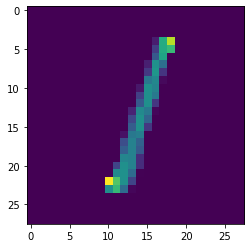

In [24]:
plt.imshow(x_test[2])
plt.show()

In [25]:
print(np.argmax(predictions[2]))

1
